# Analyses for Ecology of Histidine Kinases

First, import dependencies

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# figure 2 specific dependencies
from collections import OrderedDict
from math import log, sqrt

import numpy as np
import pandas as pd
from six.moves import cStringIO as StringIO

from bokeh.plotting import figure, show, output_file, save
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.palettes import brewer
from bokeh.palettes import Category20
from bokeh.models.mappers import LinearColorMapper

import itertools
import scipy  
import scikits.bootstrap as bootstrap  

from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns

Read in csv file containing the marine microbe data

In [2]:
df = pd.read_csv('marinedataset2_colors.csv')
df.head()

,Genome Name,org_type_y,ratio,HPK,rr,his_kin_per_100,Genome Size * assembled,Gene Count * assembled,hpkper,HybridHPK,...,Genus,Species,Ecosystem,Ecosystem Category,Ecosystem Subtype,Ecosystem Type,Ecotype,Habitat,lifestyle_color,order_color
0,Synechococcus sp. WH8102,o,0.900000,10,9.0,0.386399,2434428,2588,0.386399,2.0,...,Synechococcus,sp.,Environmental,Aquatic,Pelagic,Marine,NaN,"Aquatic, Marine",#fdae61,#3288bd
1,Synechococcus sp. WH7805,o,0.866667,15,13.0,0.510725,2620367,2937,0.510725,NaN,...,Synechococcus,Synechococcus sp. WH 7805,Environmental,Aquatic,Pelagic,Marine,NaN,Marine,#abdda4,#66c2a5
2,Synechococcus sp. WH5701,o,0.928571,14,13.0,0.411402,3043834,3403,0.411402,NaN,...,Synechococcus,Synechococcus sp. WH 5701,Environmental,Aquatic,Pelagic,Marine,NaN,Marine,#abdda4,#3288bd
3,Synechococcus sp. WH 8109,o,0.777778,9,7.0,0.333828,2111515,2696,0.333828,NaN,...,Synechococcus,Synechococcus sp. WH 8109,Environmental,Aquatic,Pelagic,Marine,NaN,"Aquatic, Marine",#abdda4,#3288bd
4,Synechococcus sp. WH 8016,o,1.000000,14,14.0,0.459619,2706690,3046,0.459619,NaN,...,Synechococcus,Synechococcus sp. WH 8016,Environmental,Aquatic,Intertidal zone,Marine,NaN,Marine,#abdda4,#3288bd


## Figure 2. Distribution of histidine kinases by genome

The figure will open in a new browser window

In [3]:
n=0
phylumDict = {}
phylumList = []
colors = Category20[len(df['Phylum'].unique())]

# setting up the color palette
for group in df.groupby('Phylum').groups.keys():
    phylumDict[group] = n
    n += 1
    phylumList.append(group)
 
phylumList = sorted(phylumList)
for index, row in df.iterrows():
    df.loc[index,'Phylum Number'] = phylumDict[row['Phylum']]
    df.loc[index,'Phylum Color']= colors[phylumDict[row['Phylum']]]



In [4]:
#sort df by Phylum
print(df.head())
df = df.sort_values(by='Species').reset_index()
df = df.sort_values(by=['Phylum Color']).reset_index()
print(df.head())

output_file('/Users/Noelle/Desktop/output.html', mode='inline')
width = 600
height = 600
inner_radius = 25

minr = 0
maxr = 150+25

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

angles = np.pi/2 - big_angle/2 - df.index.to_series()*big_angle

def rad(mic):
    return mic+25
    
p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-150, 150), y_range=(-150, 150),
    min_border=0, outline_line_color="#A9A9A9",
    toolbar_sticky=False)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.annular_wedge(0, 0, inner_radius, rad(df['HPK']),
        -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
        color=df['Phylum Color'])

p.rect([-135,-135,-135,-135,-25,-25,-25,-25,65,65,65,65],[-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143],width=7,height=5, color=colors)
p.text([-130,-130,-130,-130,-20,-20,-20,-20,70,70,70,70],[-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-14], text=phylumList,text_font_size='11pt', text_align='left',text_baseline='middle')

# circular axes and labels
labels = np.array([5,25,50,100])
radii = rad(labels)
p.circle(0, 0, radius=radii, fill_color=None, line_color="gray")
p.text(0, radii, [str(r) for r in labels],
       text_font_size="10pt", text_align="center", text_baseline="middle")
save(p)

                 Genome Name org_type_y     ratio  HPK    rr  his_kin_per_100  \
0   Synechococcus sp. WH8102          o  0.900000   10   9.0         0.386399   
1   Synechococcus sp. WH7805          o  0.866667   15  13.0         0.510725   
2   Synechococcus sp. WH5701          o  0.928571   14  13.0         0.411402   
3  Synechococcus sp. WH 8109          o  0.777778    9   7.0         0.333828   
4  Synechococcus sp. WH 8016          o  1.000000   14  14.0         0.459619   

   Genome Size   * assembled  Gene Count   * assembled    hpkper  HybridHPK  \
0                    2434428                      2588  0.386399        2.0   
1                    2620367                      2937  0.510725        NaN   
2                    3043834                      3403  0.411402        NaN   
3                    2111515                      2696  0.333828        NaN   
4                    2706690                      3046  0.459619        NaN   

      ...           Ecosystem Ecosyste

/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 14), ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 14), ('line_color', 14), ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/s

'/Users/Noelle/Desktop/output.html'

In [5]:
# by Class
from bokeh.palettes import brewer
from bokeh.palettes import Plasma, Category20
import matplotlib as mpl
from bokeh.models.mappers import LinearColorMapper
#df = pd.read_csv('marinedataset4.csv')
n=0
classDict = {}
classList = []
colors = Category20[19]
colors.append('#4ca6a6')
colors.append('#99cccc')
colors.append('#551A8B')
colors.append('#4ca6a6')
print(colors)
for group in df.groupby('ForColors').groups.keys():
    classDict[group] = n
    n += 1
    classList.append(group)
    print(group)
print(classList)

#sort df by class
newdf = df.sort_values(by=['ForColors'])
print(newdf.head())

for index, row in df.iterrows():
    newdf.loc[index,'Class Number'] = classDict[row['ForColors']]
    newdf.loc[index,'Class Color']= colors[classDict[row['ForColors']]]

    
import itertools
from bokeh.palettes import Dark2_5 as palette
from bokeh.resources import INLINE

#sort df by Phylum
#print(df.head())
#df = df.sort_values(by=['ForColors']).reset_index()
#print(df.head())

output_file('/Users/Noelle/Desktop/outputClass.html', mode='inline')
width = 600
height = 600
inner_radius = 25

minr = 0
maxr = 150+25

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

angles = np.pi/2 - big_angle/2 - df.index.to_series()*big_angle

def rad(mic):
    return mic+25
    
p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-150, 150), y_range=(-150, 150),
    min_border=0, outline_line_color="#A9A9A9",
    toolbar_sticky=False)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.annular_wedge(0, 0, inner_radius, rad(newdf['HPK']),
        -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
        color=newdf['Class Color'])

p.rect([-135,-135,-135,-135,-25,-25,-25,-25,65,65,65,65],[-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143],width=7,height=5, color=colors)
p.text([-130,-130,-130,-130,-20,-20,-20,-20,70,70,70,70],[-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-143,-122,-129,-136,-14], text=classList,text_font_size='11pt', text_align='left',text_baseline='middle')

# circular axes and labels
labels = np.array([5,25,50,100])
radii = rad(labels)
p.circle(0, 0, radius=radii, fill_color=None, line_color="gray")
p.text(0, radii, [str(r) for r in labels],
       text_font_size="10pt", text_align="center", text_baseline="middle")
save(p)

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#4ca6a6', '#99cccc', '#551A8B', '#4ca6a6']
Alphaproteobacteria
Bacteroidetes
Betaproteobacteria
Cyanobacteria
Deltaproteobacteria
Epsilonproteobacteria
Firmicutes
Gammaproteobacteria
Other
Pelagibacter
Prochlorococcus
Synechococcales
['Alphaproteobacteria', 'Bacteroidetes', 'Betaproteobacteria', 'Cyanobacteria', 'Deltaproteobacteria', 'Epsilonproteobacteria', 'Firmicutes', 'Gammaproteobacteria', 'Other', 'Pelagibacter', 'Prochlorococcus', 'Synechococcales']
     level_0  index                                        Genome Name  \
178      248     13   SAR116 cluster alpha proteobacterium sp. HIMB100   
137      334    107  Pelagibacter bacterium JGI 01_F7_4000m (contam...   
138      335    106  Pelagibacter bacterium JGI 01_G11 (contaminati...   
139      336    105  Pelagibact

/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 23), ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 23), ('line_color', 23), ('x', 12), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/noelle/miniconda3/lib/python3.6/s

'/Users/Noelle/Desktop/outputClass.html'

## Figure 3b. Copiotrophs vs. Oligotrophs: 95% Confidence Intervals

In [6]:
copiotroph = df.loc[df['org_type_y'].isin(['c'])]
oligotroph = df.loc[df['org_type_y'].isin(['o'])]

copiotrophCIs = bootstrap.ci(data=copiotroph['his_kin_per_100'], statfunction = scipy.mean)
print("Bootstrapped 95% confidence intervals: Copiotrophs \nLow:", copiotrophCIs[0], "\nHigh:", copiotrophCIs[1]) 

oligotrophCIs = bootstrap.ci(data=oligotroph['his_kin_per_100'], statfunction = scipy.mean)
print("Bootstrapped 95% confidence intervals: Oligotrophs \nLow:", oligotrophCIs[0], "\nHigh:", oligotrophCIs[1]) 



Bootstrapped 95% confidence intervals: Copiotrophs 
Low: 1.4312577452 
High: 1.6175521416
Bootstrapped 95% confidence intervals: Oligotrophs 
Low: 0.4834294495211267 
High: 0.5574701221619718


## Figure 3a. Silouette analysis for K-means clustering of no. histidine kinases as function of genome size

Both three and four clusters maximize the silouette coefficient values, we selected four clusters for further analysis as it provided more meaningful biological interpretation

In [7]:
X = df.loc[:,['Gene Count   * assembled', 'HPK']]
data = preprocessing.scale(X)

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
 
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.5989364178271939
For n_clusters = 3 The average silhouette_score is : 0.5605567804134088
For n_clusters = 4 The average silhouette_score is : 0.5626540761753327
For n_clusters = 5 The average silhouette_score is : 0.5720394785899084
For n_clusters = 6 The average silhouette_score is : 0.5886533285585706
For n_clusters = 7 The average silhouette_score is : 0.590935031418422
For n_clusters = 8 The average silhouette_score is : 0.5957196950890637
For n_clusters = 9 The average silhouette_score is : 0.6005670648001634
For n_clusters = 10 The average silhouette_score is : 0.6017332368949607


## Figure 3a Ctnd. K-means clustering of no. histidine kinases as function of genome size

[0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 2 1 1 0 2 2 2 0 3 0 0 2 1 1 0 0 0 0 0 0 0 0
 0 0 0 2 1 0 0 0 2 2 0 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 0 2
 0 2 2 2 2 1 2 3 2 2 1 1 1 0 1 1 2 2 2 0 2 0 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1
 1 0 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 0 1 1 3 1 0 0 1 1 1 1 1 0 1 0 1 1 2 2
 2 2 2 2 2 0 2 2 2 2 2 1 0 1 1 1 2 3 2 1 2 3 2 2 0 2 1 1 2 3 2 1 1 1 0 2 0
 1 0 0 3 1 2 2 0 2 2 2 2 1 0 2 2 0 1 3 1 2 3 3 3 1 1 2 3 1 0 0 0 2 0 0 1 0
 1 1 1 1 3 1 1 0 0 1 1 1 1 1 1 1 3 0 1 2 1 3 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1
 0 2 1 1 1 1 1 1 1 0 0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 3 1 1 1 0 1 0 0 1 0 0 1
 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 3]


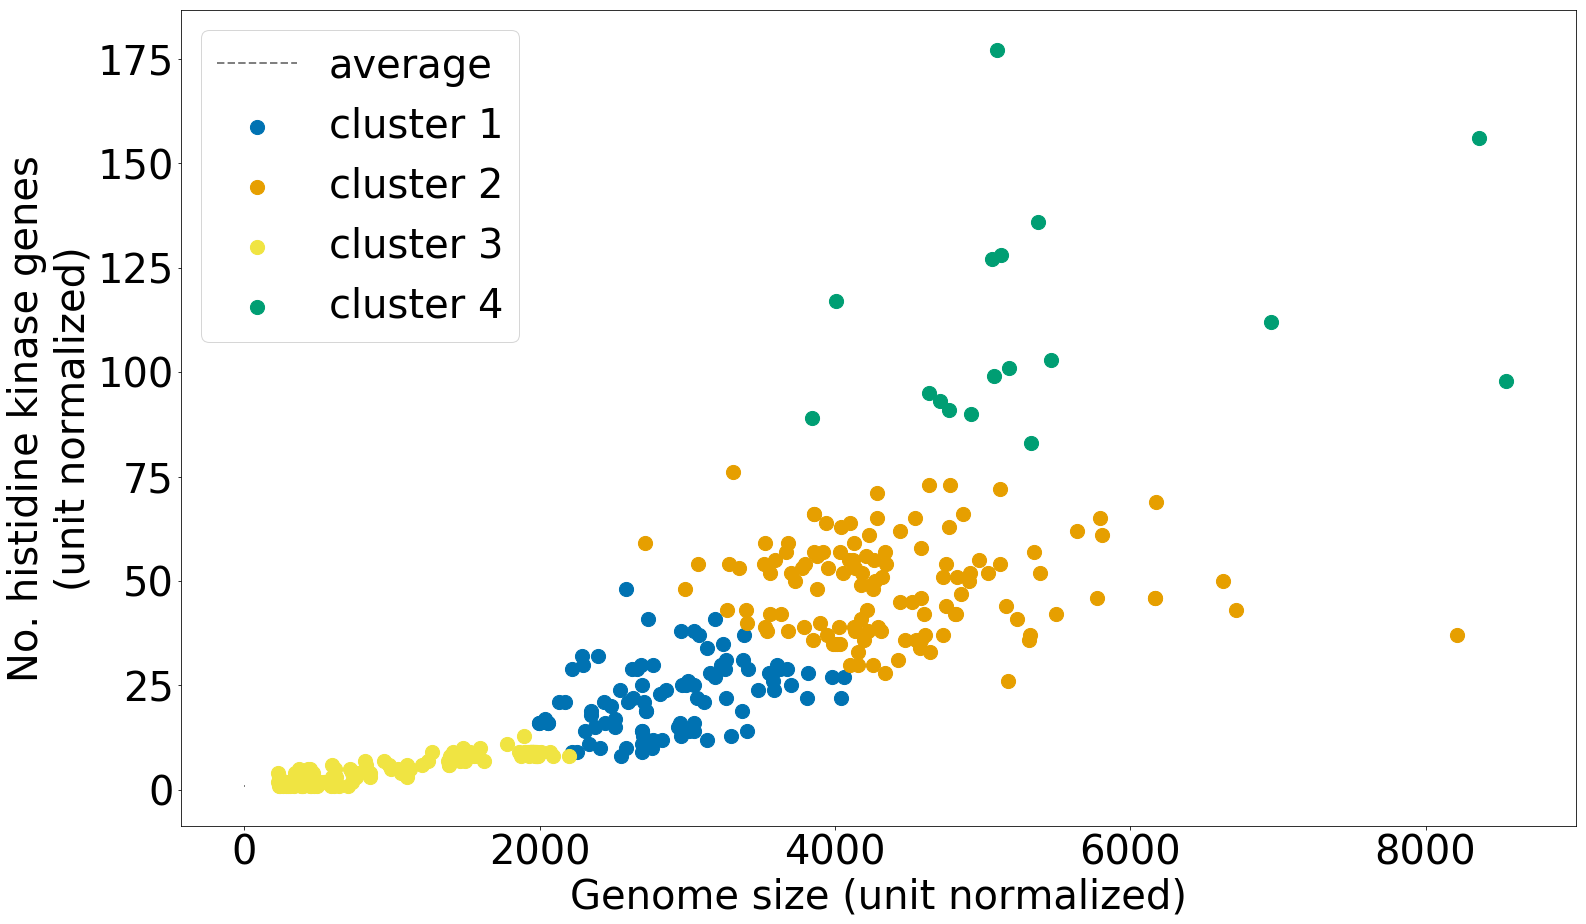

In [8]:
fig3, ax3 = plt.subplots(figsize=(25,15))
from bokeh.palettes import Colorblind, Set3, PiYG
plt.plot([0,3], [0.857,0.857], color='grey', linestyle='--', linewidth=2)
colors = Colorblind[6]
n=0

kmeans = cluster.KMeans(n_clusters=4, random_state=100)
        
kmeans.fit(data)
labels = kmeans.labels_
print(labels)
        
X['label'] = labels
        
for name, group in X.groupby('label'):
    plt.scatter(group['Gene Count   * assembled'], group['HPK'], color=colors[name], s=200)
plt.xlabel('Genome size (unit normalized)', fontsize=40)
plt.ylabel('No. histidine kinase genes\n(unit normalized)', fontsize=40)
#plt.xlim([0,3])
#plt.ylim([0,5])
plt.legend(loc='upper left', labels=['average', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6'], fontsize=40)
plt.tick_params(labelsize=40)


## Figure 4. Percent hybrid histidine kinases 95% Confidence Intervals

In [9]:
# this is broken

df['percent_hybrid'] = (df['HybridHPK']/df['HPK'])*100
marinedf = df
referencedf = pd.read_csv('refdataset2hybrids.csv')
referencedf['percent_hybrid'] = (referencedf['hybrid']/referencedf['hamp_hk'])*100


marineCIs = bootstrap.ci(data=marinedf['percent_hybrid'], statfunction = scipy.mean)
print("Bootstrapped 95% confidence intervals: Marine \nLow:", marineCIs[0], "\nHigh:", marineCIs[1]) 

referenceCIs = bootstrap.ci(data=oligotroph['his_kin_per_100'], statfunction = scipy.mean)
print("Bootstrapped 95% confidence intervals: Reference \nLow:", referenceCIs[0], "\nHigh:", referenceCIs[1])

Bootstrapped 95% confidence intervals: Marine 
Low: nan 
High: nan
Bootstrapped 95% confidence intervals: Reference 
Low: 0.48201190270422534 
High: 0.5584454118450703


/Users/noelle/miniconda3/lib/python3.6/site-packages/scikits.bootstrap-1.0.0-py3.6.egg/scikits/bootstrap/bootstrap.py:231: RuntimeWarning: invalid value encountered in less
/Users/noelle/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: InstabilityWarning: BCa acceleration values for indexes (array([0]),) were undefined. Statistic values were likely all equal. Affected CI will be inaccurate.
  if __name__ == '__main__':
/Users/noelle/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: InstabilityWarning: Some values were NaN; results are probably unstable (all values were probably equal)
  if __name__ == '__main__':


## Figure 5. Elevated RR:HK ratios in marine microbes

In [10]:
#scatter of ratios

import pandas as pd
from bokeh.palettes import brewer
from bokeh.palettes import Plasma, Category20
import matplotlib as mpl
from bokeh.models.mappers import LinearColorMapper
refdf = pd.read_csv('refdataset2hybrids.csv')
marinedf = df
n=0
classDict = {}
classList = []
colors = Category20[19]
colors.append('#4ca6a6')
colors.append('#99cccc')
colors.append('#551A8B')
colors.append('#4ca6a6')
print(colors)

import itertools
from bokeh.palettes import Dark2_5 as palette
from bokeh.resources import INLINE

b = figure(plot_width=500, plot_height=500)
x=refdf['hamp_hk']
y=refdf['pfam00072']

x2 = marinedf['HPK']
y2 = marinedf['rr']
b.scatter(x, y, size=4, color='#67a9cf')
b.scatter(x2, y2, size=4, color='#ef8a62')
b.xaxis.axis_label = 'No. Histidine Kinases'
b.yaxis.axis_label = 'No. Hybrid Histidine Kinases'
b.xaxis.axis_label_text_font_size = "12pt"
b.yaxis.axis_label_text_font_size = "12pt"
b.xaxis.major_label_text_font_size = "10pt"
b.yaxis.major_label_text_font_size = "10pt"


#b.line(p_x,lower)
#b.line(p_x,upper)
#show(b)



show(b)

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#4ca6a6', '#99cccc', '#551A8B', '#4ca6a6']


## Figure 6. Violin plots


     level_0  index                                        Genome Name  \
79       205    150                    Pseudoalteromonas sp. DSM 26666   
80       242     19  SAR11 cluster bacterium JGI GoM_1m_182_D02 (co...   
81       206    149                        Pseudoalteromonas sp. NJ631   
82       243     18  SAR11 cluster bacterium JGI GoM_1m_182_G01 (co...   
83       240     21  SAR11 cluster bacterium JGI GoM_1470m_185_E04 ...   
84       231    207                             Roseobacter sp. GAI101   
85       232    206                             Roseobacter sp. MED193   
86       233    205                          Roseobacter sp. SK209-2-6   
87       234    204                        Roseovarius nubinhibens ISM   
88       235    203                                Roseovarius sp. 217   
89       236    202                             Roseovarius sp. TM1035   
90       237     24  SAR11 cluster bacterium JGI ETNP_125m_186_C10 ...   
91       238     23  SAR11 cluster bac

/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


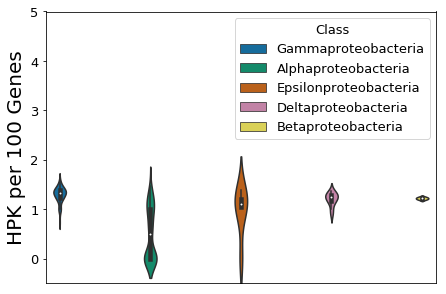

In [11]:
font = {'family' : 'normal',
        'size'   : 13}
plt.rc('font', **font)


fig, ax = plt.subplots(figsize=[7,5])
grouped = df.groupby('Phylum')
for name, group in grouped:
    if name == "Proteobacteria":
        k = group
print(k)
sns.violinplot(x="Class", y="ratio", hue="Class", data=k, palette="colorblind", width=0.8)
plt.xticks(rotation=45)
plt.ylabel(s=14)
plt.ylabel('HPK per 100 Genes', fontsize=20) 
ax.get_xaxis().set_visible(False)
ax.set_ylim([-0.5,5])
plt.subplots_adjust(hspace = 0.01)
#plt.legend(bbox_to_anchor=(0.51,0.45),
#           bbox_transform=plt.gcf().transFigure)
#plt.tight_layout()
plt.show()


    level_0  index                                    Genome Name org_type_y  \
9        63    321                         Cyanobium sp. PCC 7001        NaN   
10      303      6                       Synechococcus sp. CC9902          o   
11       61    118                  Crocosphaera watsonii WH 8501          o   
12       60    123                  Crocosphaera watsonii WH 0003          o   
13       59    122  Crocosphaera watsonii WH 0003 ((899 contigs))          o   
14       57    120         Crocosphaera watsonii WH 0401 (draft1)          o   
15      178     60                Prochlorococcus marinus MIT9201          o   
16       55    117                  Crocosphaera watsonii WH 8502          o   
17       54    124                  Crocosphaera watsonii WH 0003          o   
18      304      0                       Synechococcus sp. WH8102          o   
19      156     67                 Prochlorococcus marinus AS9601          o   
20      157     40                   Pro

/Users/noelle/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


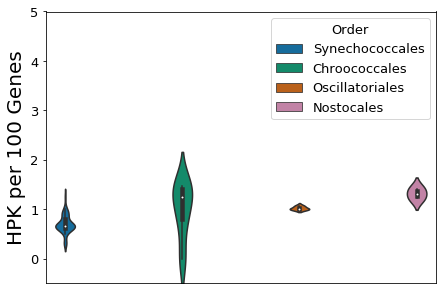

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


font = {'family' : 'normal',
        'size'   : 13}
plt.rc('font', **font)


fig, ax = plt.subplots(figsize=[7,5])
grouped = df.groupby('Phylum')
for name, group in grouped:
    if name == "Cyanobacteria":
        k = group
print(k)
sns.violinplot(x="Order", y="ratio", hue="Order", data=k, palette="colorblind", width=0.8)
plt.xticks(rotation=45)
plt.ylabel(s=14)
plt.ylabel('HPK per 100 Genes', fontsize=20) 
ax.get_xaxis().set_visible(False)
ax.set_ylim([-0.5,5])
plt.subplots_adjust(hspace = 0.01)
#plt.legend(bbox_to_anchor=(0.51,0.45),
#           bbox_transform=plt.gcf().transFigure)
#plt.tight_layout()
plt.show()

## Figure 7. Distribution of TCS genes on genome (number line plots)

2781240
2263440
4506695
3197797
4134251
2006327
4605420
944030
562235
4213613
247030
4531148
2707512
2300517
3226312
2897774
2951266
4311099
3338870
3548300
3311264
4429259
1130309
3963949
979986
3152179
227675
2162134
2112874
4294358
4626127
2055555
3662378
538810
1239441
2074187
2675286
2963811
3098258
3648304
195803
4489556
3623522
1662820
1349507
2004358
4300540
3207966
3228669
823837
2612775
2849601
3490412
3638395
2671457
3452441
253907
4431489
4506695
3197797
2006327
4213613
978991
1639983
660460
4531148
2707512
2002782
2952341
1645406
564489
3640418
539969
2846340
1053642
3548300
4621038
1130309
3642350
2884682
979986
4626127
2264918
2055555
1239441
3098258
2963811
3491770
229246
2839576
3623522
1829554
1349507
3650499
3227715
1129220
3207966
3210838
816970
945358
2945909
2612049
3452441
3754442
818659
4135721
3354243
2005862
561061
248286
1352856
1756102
1126913
2779798
3151512
4492095
2897774
1366987
673773
4488185
3338870
4634452
2501898
3664179
825823
926655
2162134
4604794

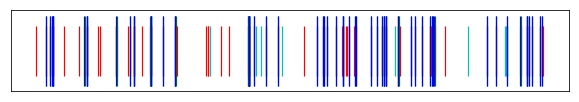

In [14]:
# one example - ingest is a list of all proteins in the genome with their start coordinate 
rrFile = pd.read_csv("199_rr.csv")
hkFile = pd.read_csv("199hk.csv") 

fig = plt.figure(figsize = (10,1.5))
ax = fig.add_subplot(111)
y = 1.5
hkList = []
rrList = []

for i, row in hkFile.iterrows():
    xValue = row['Start Coord']
    print(xValue)
    plt.plot(xValue,y, 'c|', ms = 50, mew = 1.2, mfc = 'c')
    hkList.append(xValue)

for i, row in rrFile.iterrows():
    xValue = row['Start Coord']
    print(xValue)
    plt.plot(xValue,y, 'r|', ms = 50, mew = 1.2, mfc = 'r')
    rrList.append(xValue)

matchList = []
for item in hkList:
    print(item)
    #15000 should be something like 3 genes
    lowerRange = item - 3695
    upperRange = item + 3695
    for item2 in rrList:
        item2 = int(item2)
        #find all rrs that are not near an HPK
        if item2 in range(lowerRange, upperRange):
            print("in operon")
            matchList.append(item2)
matchList2 = []
for item in rrList:
    lowerRange = item - 3695
    upperRange = item + 3695
    for item2 in hkList:
        item2 = int(item2)
        if item2 in range (lowerRange, upperRange):
            print("in operon")
            matchList2.append(item2)
for item in matchList:
    plt.plot(item, y, 'g|', ms = 70, mew = 1.2, mfc = 'g')
for item in matchList2:
    plt.plot(item, y, 'b|', ms=70, mew=1.2, mfc='b')

ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

myset = set(matchList)
print(len(myset))
print(len(set(matchList2)))
print(len(hkFile))
print(len(rrFile))

plt.show()